C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

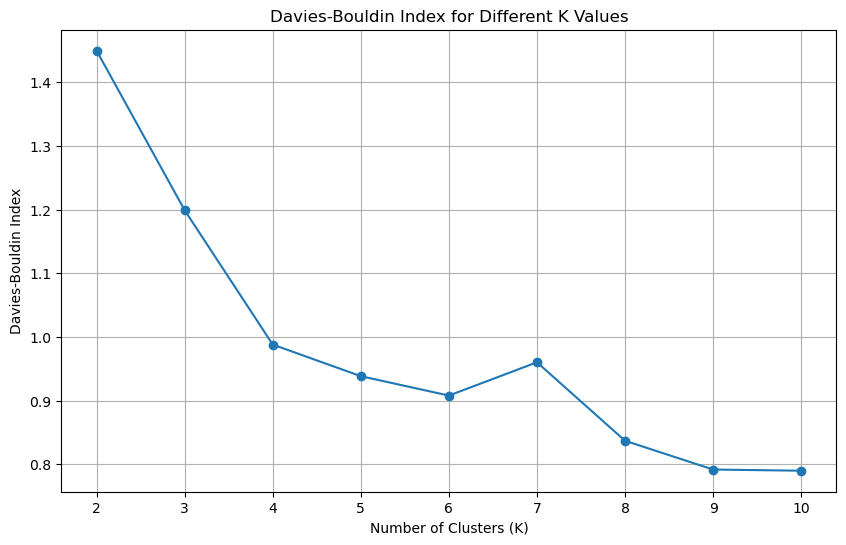

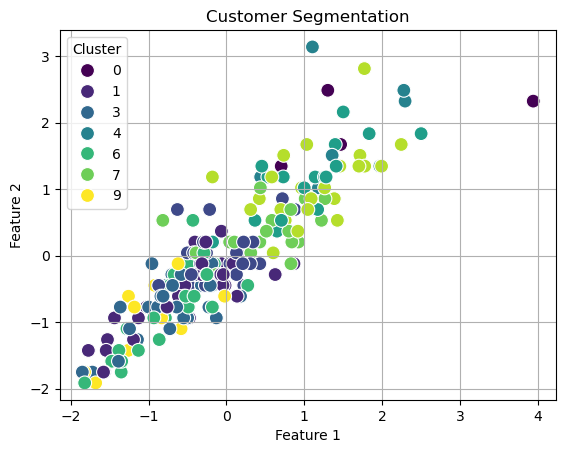

Optimal number of clusters: 10
Davies-Bouldin Index for optimal K: 0.7900


In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns


customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')


merged_data = pd.merge(transactions, customers, on='CustomerID')


customer_summary = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Total spending
    'Quantity': 'sum',    # Total quantity purchased
    'TransactionID': 'count'  # Number of transactions
}).rename(columns={'TransactionID': 'TransactionCount'}).reset_index()


customer_summary = pd.merge(customer_summary, customers[['CustomerID', 'Region']], on='CustomerID')


customer_summary = pd.get_dummies(customer_summary, columns=['Region'], drop_first=True)


features = customer_summary.drop(['CustomerID'], axis=1)
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)


db_scores = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(normalized_features)
    db_index = davies_bouldin_score(normalized_features, clusters)
    db_scores.append(db_index)


optimal_k = k_values[np.argmin(db_scores)]


kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_summary['Cluster'] = kmeans.fit_predict(normalized_features)


plt.figure(figsize=(10, 6))
plt.plot(k_values, db_scores, marker='o')
plt.title('Davies-Bouldin Index for Different K Values')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Davies-Bouldin Index')
plt.grid()
plt.show()


sns.scatterplot(
    x=normalized_features[:, 0], y=normalized_features[:, 1], 
    hue=customer_summary['Cluster'], palette='viridis', s=100
)
plt.title('Customer Segmentation')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.show()

print(f'Optimal number of clusters: {optimal_k}')
print(f'Davies-Bouldin Index for optimal K: {min(db_scores):.4f}')

customer_summary.to_csv('Customer_Segmentation_Results.csv', index=False)
